https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary

In [1]:
import pandas as pd

df = pd.read_csv("ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


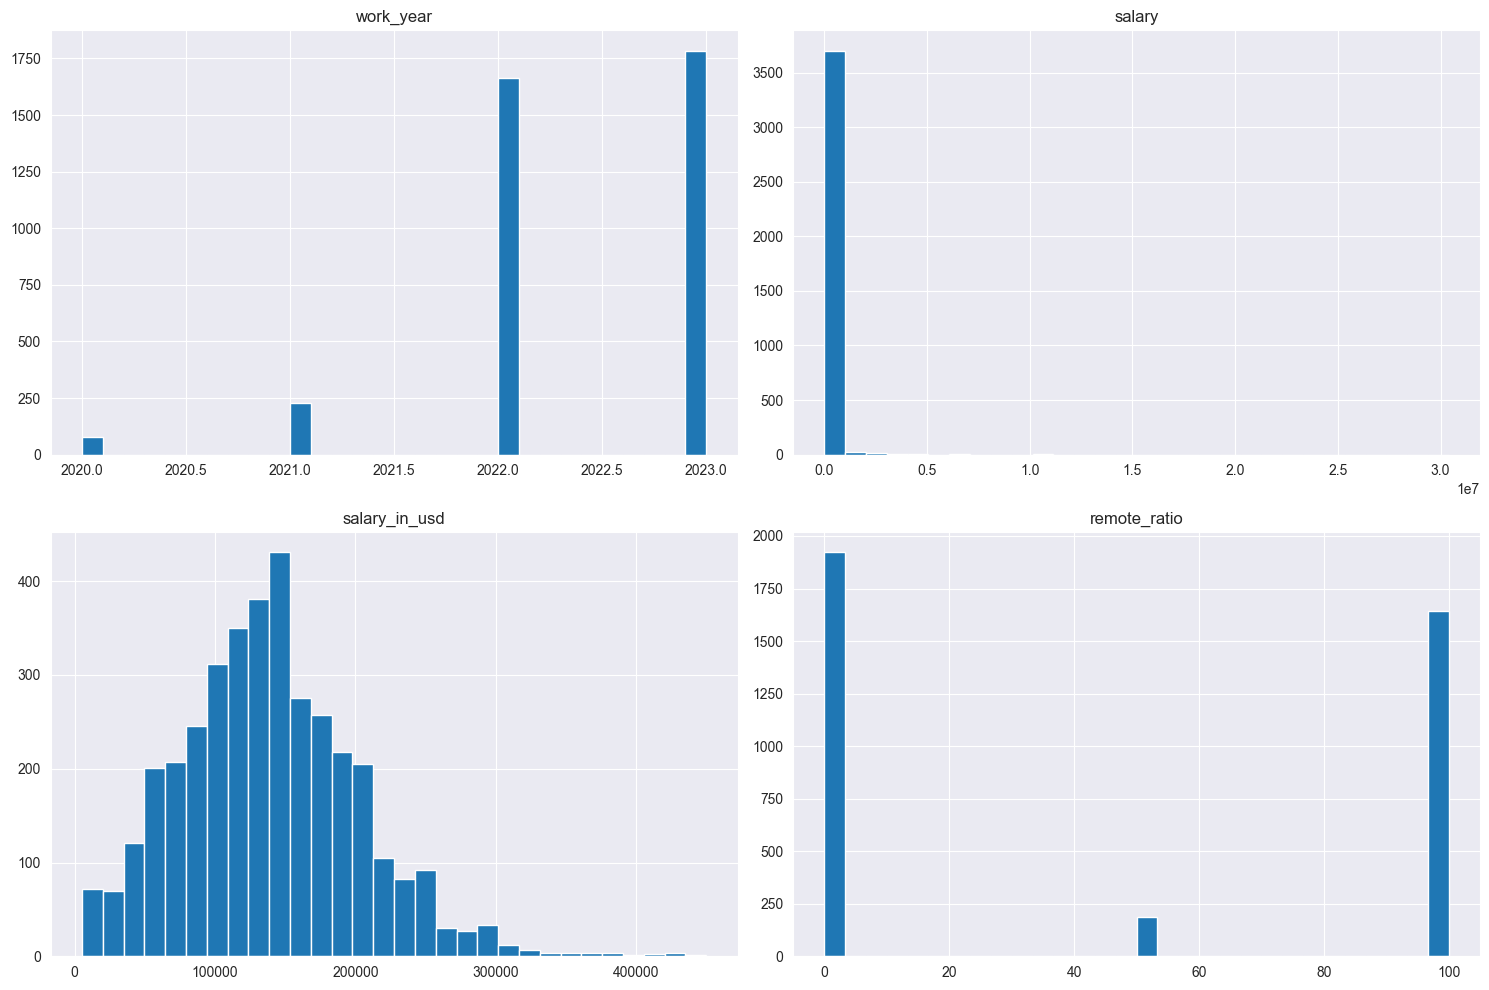

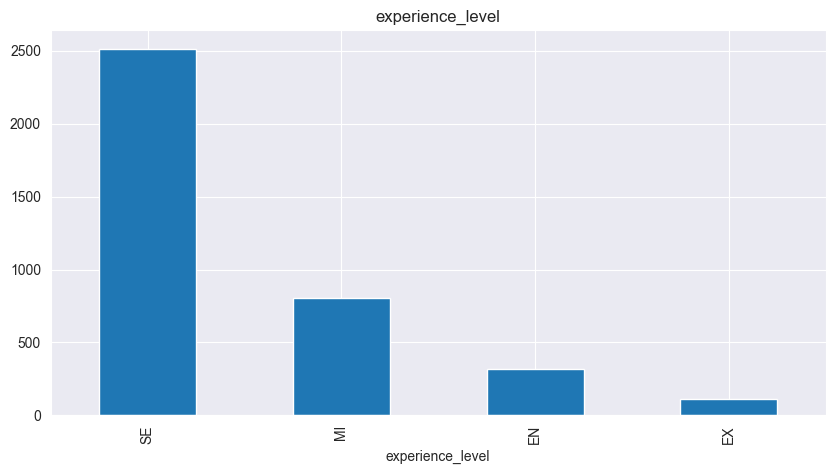

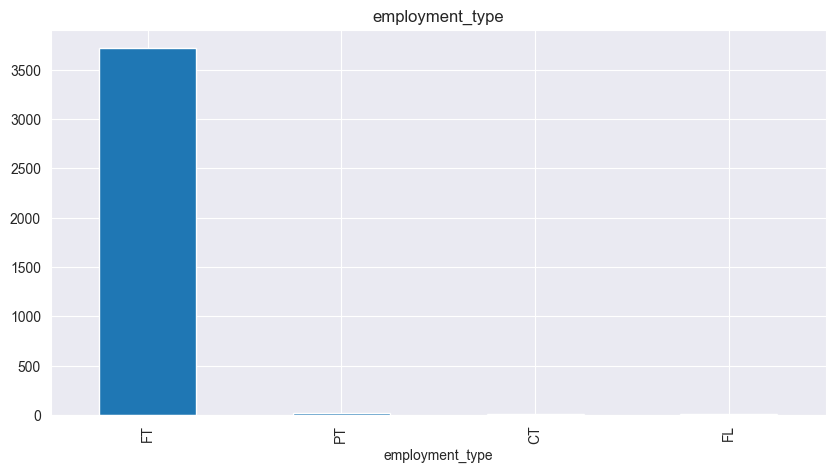

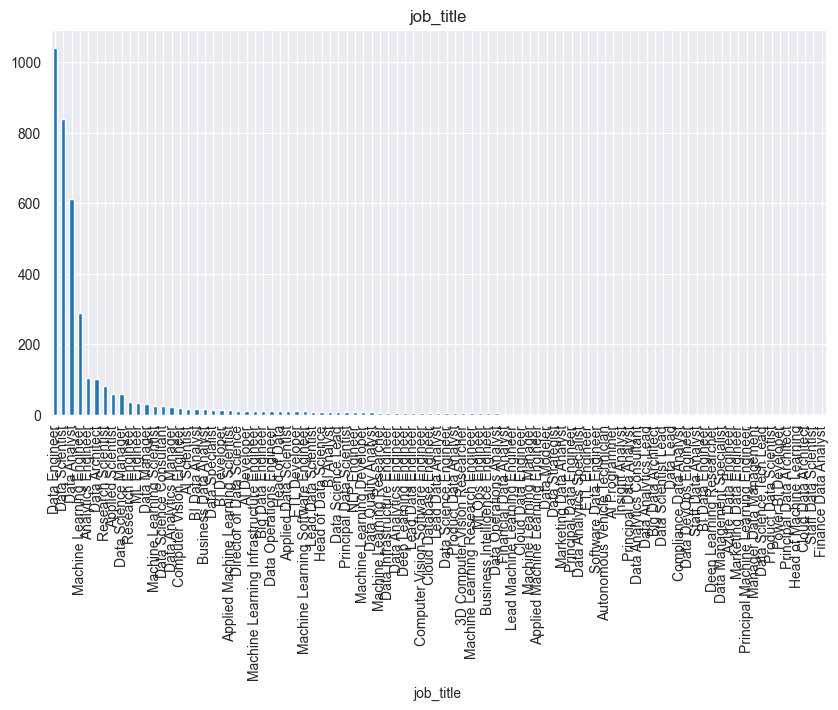

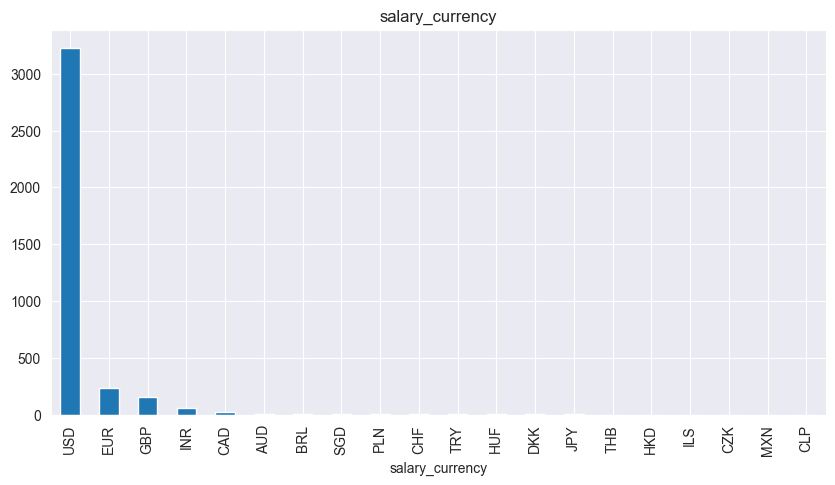

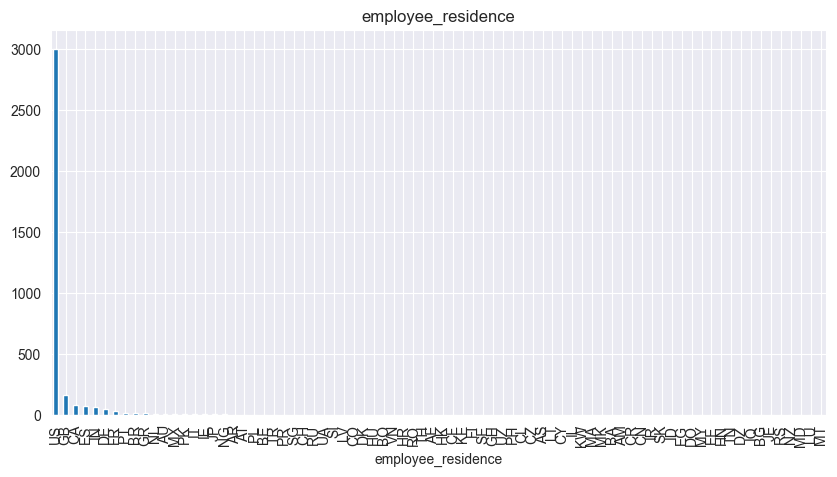

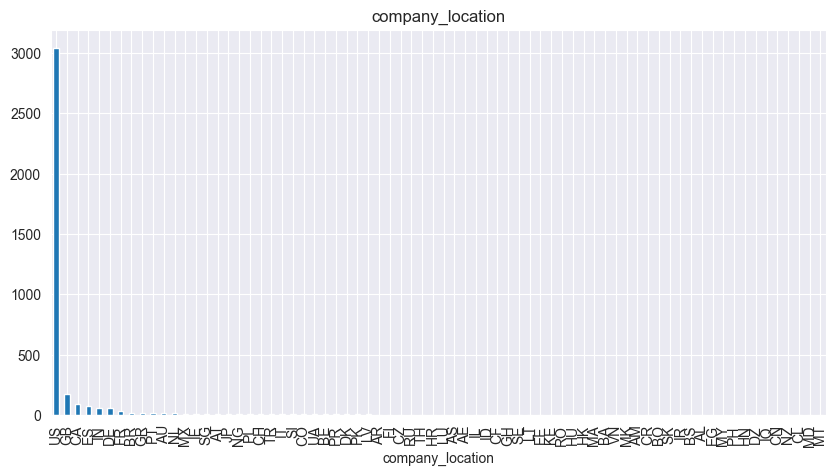

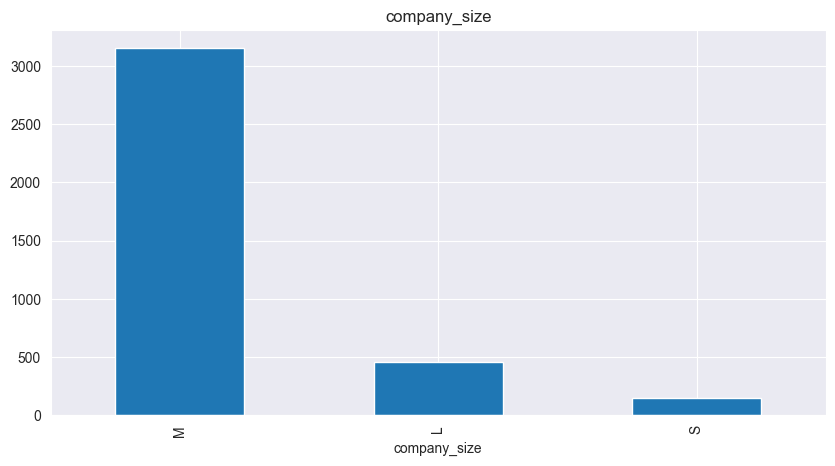

In [2]:
#show distribution over each column
import matplotlib.pyplot as plt
# Plot histograms for each numerical column
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot bar charts for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', figsize=(10, 5), title=column)
    plt.show()

### Data Cleaning: Removing Columns with Dominant Categories

Some columns in the dataset have a single category that dominates the majority of the entries. For example, in the `employment_type` column, almost everyone is a full-time employee. To ensure the quality and reliability of the analysis, these columns will be removed from the dataset.

In [3]:
df.drop(columns=['employment_type'], inplace=True)

### Data Cleaning: Restricting Dataset to USA and USD

Due to the small number of entries for other locations and currencies, the dataset will be restricted to entries where the `employee_residence` is the USA and the `salary_currency` is USD. This will ensure a more consistent and reliable analysis.

In [4]:
# Restrict the dataset to entries from the USA and paid in USD
df = df[(df['employee_residence'] == 'US') & (df['salary_currency'] == 'USD') &  (df['company_location'] == 'US')].copy()
df.drop(columns=["salary","salary_currency", "employee_residence", "company_location"], inplace=True)
df

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size
1,2023,MI,ML Engineer,30000,100,S
2,2023,MI,ML Engineer,25500,100,S
5,2023,SE,Applied Scientist,222200,0,L
6,2023,SE,Applied Scientist,136000,0,L
9,2023,SE,Data Scientist,147100,0,M
...,...,...,...,...,...,...
3749,2021,SE,Data Specialist,165000,100,L
3750,2020,SE,Data Scientist,412000,100,L
3751,2021,MI,Principal Data Scientist,151000,100,L
3752,2020,EN,Data Scientist,105000,100,S


### Data Cleaning: Adjusting Salaries for Cumulative Inflation
To ensure consistency in the analysis, salaries from previous years will be adjusted to 2023 values using the inflation rate in the US. This adjustment will allow for a more accurate comparison of salaries over time.

In [5]:
inflation_rates = {
    2020: 1.1497,  # Adjust by approximately 14.97%
    2021: 1.1360,  # Adjust by approximately 13.60%
    2022: 1.084,   # Adjust by approximately 8.4%
    2023: 1.00     # No adjustment needed for 2023
}

# Adjust salaries to 2023 values
df['adjusted_salary'] = df.apply(lambda row: row['salary_in_usd'] * inflation_rates[row['work_year']], axis=1)
df.drop(columns=['salary_in_usd', 'work_year'], inplace=True)
df

,experience_level,job_title,remote_ratio,company_size,adjusted_salary
1,MI,ML Engineer,100,S,30000.0
2,MI,ML Engineer,100,S,25500.0
5,SE,Applied Scientist,0,L,222200.0
6,SE,Applied Scientist,0,L,136000.0
9,SE,Data Scientist,0,M,147100.0
...,...,...,...,...,...
3749,SE,Data Specialist,100,L,187440.0
3750,SE,Data Scientist,100,L,473676.4
3751,MI,Principal Data Scientist,100,L,171536.0
3752,EN,Data Scientist,100,S,120718.5


### Data Cleaning: Converting Numerical Column remote_ratio to Categorical

The `remote_ratio` column is a numerical column representing the proportion of remote work. To simplify the analysis, this column will be converted into a categorical column with three categories: `In office`, `hydrid`, and `Remote`, removing the original column.

In [6]:
df['remote_ratio'] = pd.cut(df['remote_ratio'], bins=[-1, 0, 50, 100], labels=['In office', 'Hybrid', 'Remote'])
df

,experience_level,job_title,remote_ratio,company_size,adjusted_salary
1,MI,ML Engineer,Remote,S,30000.0
2,MI,ML Engineer,Remote,S,25500.0
5,SE,Applied Scientist,In office,L,222200.0
6,SE,Applied Scientist,In office,L,136000.0
9,SE,Data Scientist,In office,M,147100.0
...,...,...,...,...,...
3749,SE,Data Specialist,Remote,L,187440.0
3750,SE,Data Scientist,Remote,L,473676.4
3751,MI,Principal Data Scientist,Remote,L,171536.0
3752,EN,Data Scientist,Remote,S,120718.5


### Data overview after cleaning

In [7]:
df.describe(include='all')

,experience_level,job_title,remote_ratio,company_size,adjusted_salary
count,2999,2999,2999,2999,2999.000000
unique,4,69,3,3,NaN
top,SE,Data Engineer,In office,M,NaN
freq,2250,903,1667,2710,NaN
mean,NaN,NaN,NaN,NaN,159124.280022
std,NaN,NaN,NaN,NaN,57586.383770
min,NaN,NaN,NaN,NaN,25500.000000
25%,NaN,NaN,NaN,NaN,120000.000000
50%,NaN,NaN,NaN,NaN,151760.000000
75%,NaN,NaN,NaN,NaN,194418.110000


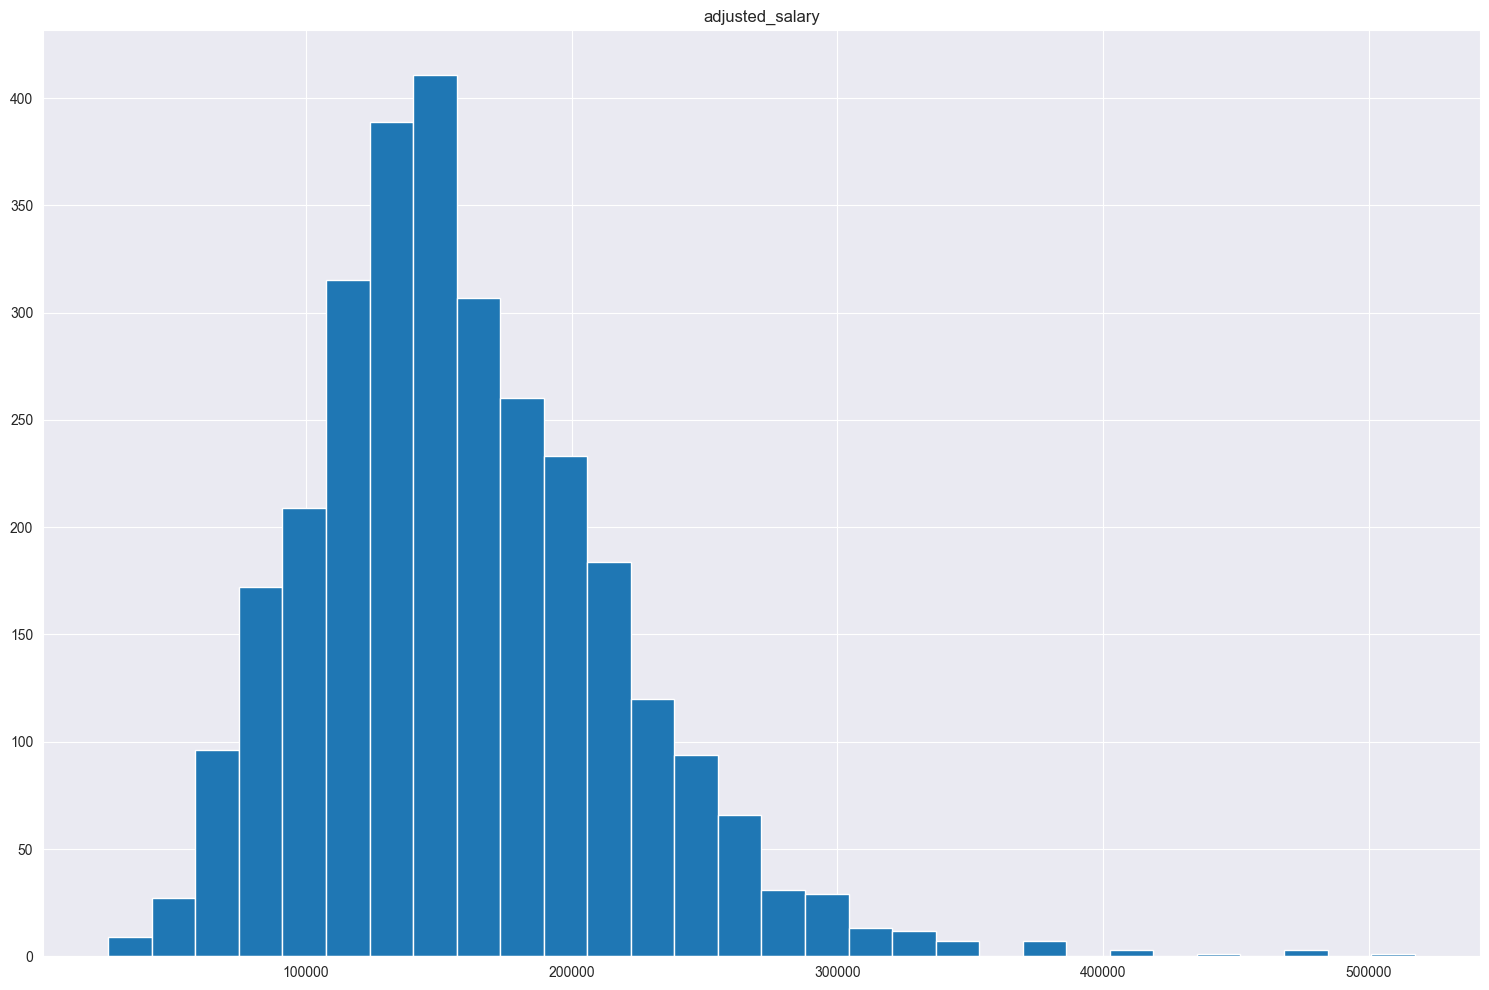

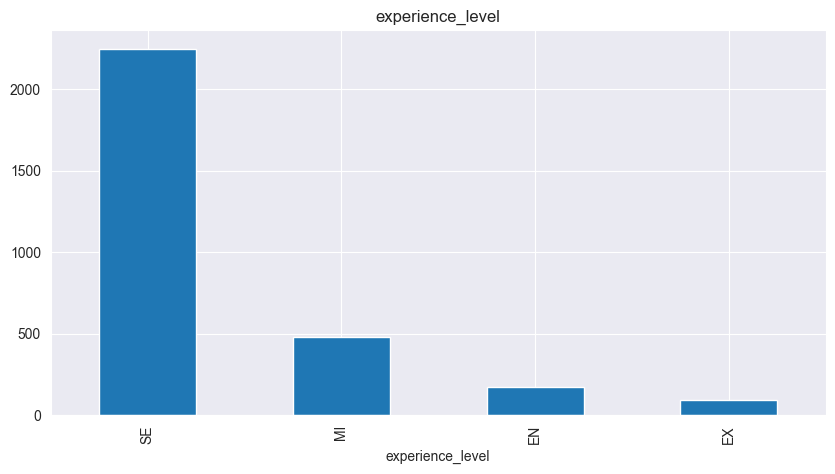

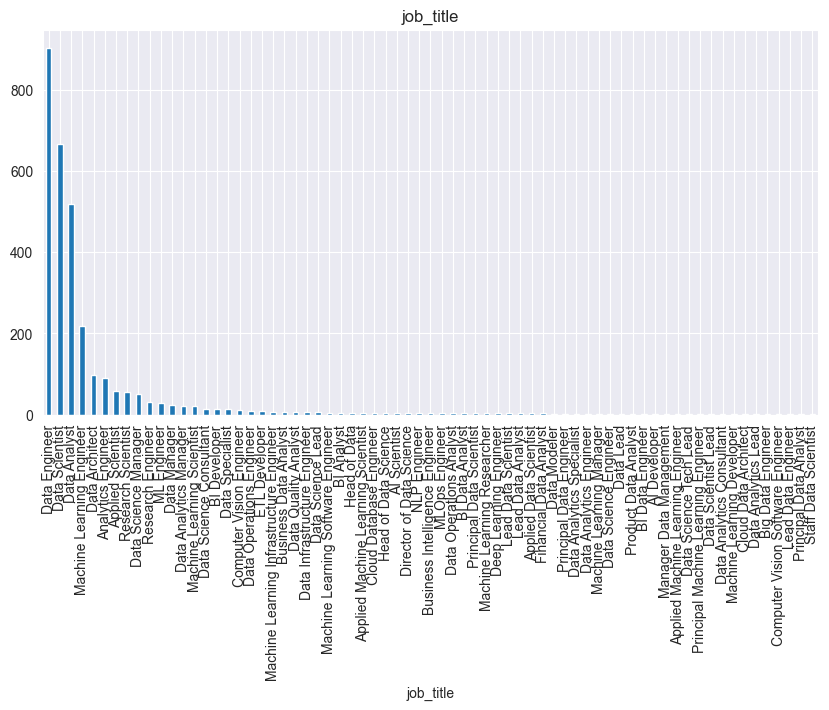

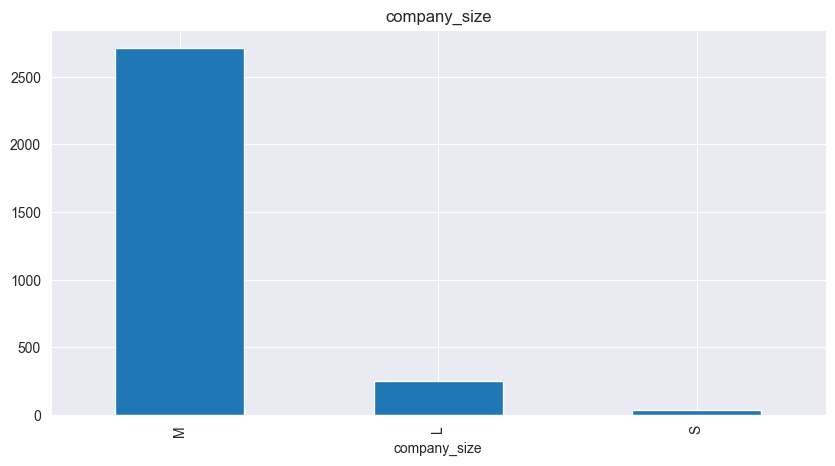

In [8]:
# Plot histograms for each numerical column
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot bar charts for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', figsize=(10, 5), title=column)
    plt.show()
    



In [9]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_ds_salaries.csv', index=False)

### Check Normality of Salary Distribution

Since ti is important to check the normality of the salary distribution before performing statistical tests, we will use the Shapiro-Wilk test to check the normality of the salary distribution.

In [10]:
from scipy.stats import shapiro
df = pd.read_csv('cleaned_ds_salaries.csv')
# Check normality of salary (adjusted_salary
stat, p_value = shapiro(df['adjusted_salary'])


normality_results = {
    "Test Statistic": stat,
    "P-Value": p_value,
    "Normality": "Normal" if p_value > 0.05 else "Not Normal"
}
normality_results

{'Test Statistic': np.float64(0.9626839425316132),
 'P-Value': np.float64(3.754457635601739e-27),
 'Normality': 'Not Normal'}

### 1. **Hypothesis: Does experience level significantly affect salary in USD?**
   - **Test**: **Mood’s Median Test** 
   - **Reason**: You are comparing salaries across multiple groups (experience levels: EN, MI, SE, EX).

---

### 2. **Hypothesis: Is the proportion of remote work associated with salary in USD?**
   - **Test**: **Mood’s Median Test** 
   - **Reason**: This tests the strength and direction of the relationship between the remote ratio (a continuous variable) and salary in USD.

---

### 3. **Hypothesis: Do Data Scientists working for companies of different sizes (Small, Medium, Large) earn significantly different salaries in USD?**
   - **Test**: **Kruskal-Wallis Test**
   - **Reason**: This tests whether salaries differ between two subsets of company sizes (e.g., small vs. large).

---

### 4. **Hypothesis: Does the rate of remote workers significantly differs for job titles?**
 - **Test**: **Chi-square Test of Independence**
 - **Reason**: This test is used to determine whether there is a significant association between two categorical variables (job title and remote ratio).
---

### 5. **Hypothesis**: Does the job title significantly affect the salary in USD?
   - **Test**: **Kruskal-Wallis Test** 
   - **Reason**: Job titles are categorical, and salaries in USD can be compared across groups using ANOVA or its non-parametric alternative.


In [11]:
from scipy.stats import mood

# Hypothesis 1: Experience Level vs. Salary
experience_levels = df['experience_level'].unique()

# Perform Mood's Median Test for each pair of experience levels
experience_salary_results = []
for i, level1 in enumerate(experience_levels):
    for level2 in experience_levels[i + 1:]:
        data1 = df[df['experience_level'] == level1]['adjusted_salary']
        data2 = df[df['experience_level'] == level2]['adjusted_salary']
        stat, p_value = mood(data1, data2)
        experience_salary_results.append({
            'Group 1': level1,
            'Group 2': level2,
            'Test Statistic': stat,
            'P-Value': p_value,
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })

experience_salary_results

[{'Group 1': 'MI',
  'Group 2': 'SE',
  'Test Statistic': np.float64(2.1591527108528976),
  'P-Value': np.float64(0.03083832141612537),
  'Significant': 'Yes'},
 {'Group 1': 'MI',
  'Group 2': 'EN',
  'Test Statistic': np.float64(-3.576358652298474),
  'P-Value': np.float64(0.0003484135651977868),
  'Significant': 'Yes'},
 {'Group 1': 'MI',
  'Group 2': 'EX',
  'Test Statistic': np.float64(-5.855148029660403),
  'P-Value': np.float64(4.7658532738688035e-09),
  'Significant': 'Yes'},
 {'Group 1': 'SE',
  'Group 2': 'EN',
  'Test Statistic': np.float64(-8.36433268613415),
  'P-Value': np.float64(6.045611112635496e-17),
  'Significant': 'Yes'},
 {'Group 1': 'SE',
  'Group 2': 'EX',
  'Test Statistic': np.float64(-4.009808692736711),
  'P-Value': np.float64(6.076796186424722e-05),
  'Significant': 'Yes'},
 {'Group 1': 'EN',
  'Group 2': 'EX',
  'Test Statistic': np.float64(-2.603519455896338),
  'P-Value': np.float64(0.009227203030546168),
  'Significant': 'Yes'}]

In [12]:
# Hypothesis 2: Remote Ratio vs. Salary
remote_ratios = df['remote_ratio'].unique()

# Perform Mood's Median Test for each pair of remote ratios
remote_salary_results = []
for i, ratio1 in enumerate(remote_ratios):
    for ratio2 in remote_ratios[i + 1:]:
        data1 = df[df['remote_ratio'] == ratio1]['adjusted_salary']
        data2 = df[df['remote_ratio'] == ratio2]['adjusted_salary']
        stat, p_value = mood(data1, data2)
        remote_salary_results.append({
            'Group 1': ratio1,
            'Group 2': ratio2,
            'Test Statistic': stat,
            'P-Value': p_value,
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })
remote_salary_results

[{'Group 1': 'Remote',
  'Group 2': 'In office',
  'Test Statistic': np.float64(2.0500846917548015),
  'P-Value': np.float64(0.04035616696546848),
  'Significant': 'Yes'},
 {'Group 1': 'Remote',
  'Group 2': 'Hybrid',
  'Test Statistic': np.float64(-1.744554677728113),
  'P-Value': np.float64(0.08106241586313724),
  'Significant': 'No'},
 {'Group 1': 'In office',
  'Group 2': 'Hybrid',
  'Test Statistic': np.float64(-2.132388976565932),
  'P-Value': np.float64(0.03297488285098324),
  'Significant': 'Yes'}]

In [13]:
# Hypothesis 3: Company Size vs. Salary
from scipy.stats import kruskal
import scikit_posthocs as sp

# Perform Kruskal-Wallis Test for company size vs. salary
company_sizes = df['company_size'].unique()
data = [df[df['company_size'] == size]['adjusted_salary'] for size in company_sizes]
stat, p_value = kruskal(*data)

# If Kruskal-Wallis test is significant, perform Dunn's test
if p_value < 0.05:
    dunn_results = sp.posthoc_dunn(df, val_col='adjusted_salary', group_col='company_size')
    print(dunn_results)
else:
    print("No significant differences found with Kruskal-Wallis test.")

          L         M         S
L  1.000000  0.025201  0.000015
M  0.025201  1.000000  0.000215
S  0.000015  0.000215  1.000000


In [14]:
# check the median salary for each company size
df.groupby('company_size')['adjusted_salary'].median()


company_size
L    161895.4
M    151760.0
S    117072.0
Name: adjusted_salary, dtype: float64

In [15]:
# filter only the titles that have more than 10 entries
title_counts = df['job_title'].value_counts()
df = df[df['job_title'].isin(title_counts[title_counts > 10].index)]

In [16]:
# Hypothesis 4: Job Title vs. Remote Ratio
from scipy.stats import chi2_contingency


# Create a contingency table of job title vs. remote ratio
contingency_table = pd.crosstab(df['job_title'], df['remote_ratio'])
stat, p_value, _, _ = chi2_contingency(contingency_table)

job_remote_results = {
    'Test Statistic': stat,
    'P-Value': p_value,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
}
job_remote_results

{'Test Statistic': np.float64(160.41585661734518),
 'P-Value': np.float64(2.5586112743918587e-18),
 'Significant': 'Yes'}

In [17]:
#what is the distribution of remote ratio for each job title
df.groupby('job_title')['remote_ratio'].value_counts(normalize=True).unstack().fillna(0)

remote_ratio,Hybrid,In office,Remote
job_title,,,
Analytics Engineer,0.010989,0.461538,0.527473
Applied Scientist,0.000000,0.551724,0.448276
BI Developer,0.000000,0.307692,0.692308
Computer Vision Engineer,0.000000,0.909091,0.090909
Data Analyst,0.005792,0.544402,0.449807
Data Analytics Manager,0.000000,0.619048,0.380952
Data Architect,0.000000,0.329897,0.670103
Data Engineer,0.000000,0.609081,0.390919
Data Manager,0.000000,0.833333,0.166667


In [18]:
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests
import pandas as pd

# Get unique job titles
job_titles = df['job_title'].unique()

# Prepare data for Kruskal-Wallis Test
data = [df[df['job_title'] == title]['adjusted_salary'] for title in job_titles]

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(*data)

# Output Kruskal-Wallis results
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Significant differences found, performing pairwise comparisons...")

    # Pairwise Mann-Whitney U Tests
    pairwise_results = []
    for i, title1 in enumerate(job_titles):
        for j, title2 in enumerate(job_titles):
            if i < j:  # Avoid duplicate comparisons
                group1 = df[df['job_title'] == title1]['adjusted_salary']
                group2 = df[df['job_title'] == title2]['adjusted_salary']

                # Perform Mann-Whitney U test
                u_stat, pairwise_p = mannwhitneyu(group1, group2, alternative='two-sided')
                pairwise_results.append({
                    'Job Title 1': title1,
                    'Job Title 2': title2,
                    'U-Statistic': u_stat,
                    'P-Value': pairwise_p,
                    'Mean Difference': group1.mean() - group2.mean() if pairwise_p < 0.05 else None
                })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(pairwise_results)

    # Adjust for multiple comparisons (Bonferroni correction)
    corrected_p = multipletests(results_df['P-Value'], method='bonferroni')[1]
    results_df['Corrected P-Value'] = corrected_p
    results_df['Significant'] = results_df['Corrected P-Value'] < 0.05

    # Display results
    print("Pairwise Comparison Results:")
results_df


Kruskal-Wallis Test Statistic: 443.90885972290937
P-Value: 1.1777661889396513e-83
Significant differences found, performing pairwise comparisons...
Pairwise Comparison Results:


,Job Title 1,Job Title 2,U-Statistic,P-Value,Mean Difference,Corrected P-Value,Significant
0,ML Engineer,Applied Scientist,733.0,4.691191e-01,NaN,1.000000,False
1,ML Engineer,Data Scientist,11028.0,1.011551e-01,NaN,1.000000,False
2,ML Engineer,Data Analyst,11318.0,5.722727e-07,60103.105382,0.000088,True
3,ML Engineer,Machine Learning Engineer,3215.5,6.455758e-01,NaN,1.000000,False
4,ML Engineer,Data Engineer,15740.5,2.704524e-02,22938.570244,1.000000,False
...,...,...,...,...,...,...,...
148,Data Specialist,BI Developer,76.0,6.812056e-01,NaN,1.000000,False
149,Data Specialist,Data Science Consultant,97.0,7.893624e-01,NaN,1.000000,False
150,Machine Learning Scientist,BI Developer,236.0,4.489777e-04,52700.703297,0.068694,False
151,Machine Learning Scientist,Data Science Consultant,269.0,4.282392e-05,64838.207143,0.006552,True


## Linear Regression Analysis: Predicting Salaries

In this section, we aim to analyze the relationship between salaries and other variables such as the proportion of remote work (`remote_ratio`) and company size (`company_size`). By applying a linear regression model, we aim to uncover patterns that can predict adjusted salaries based on these factors. The steps include:

1. Encoding categorical variables for numerical representation.
2. Splitting the dataset into training and testing subsets.
3. Training a linear regression model.
4. Evaluating the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.
5. Visualizing the results to compare actual vs. predicted salaries.


Mean Squared Error (MSE): 3235606225.49
R-squared: 0.12


/var/folders/0_/14m9hb7n2234bn6kbkgxxvbr0000gn/T/ipykernel_3261/834438126.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


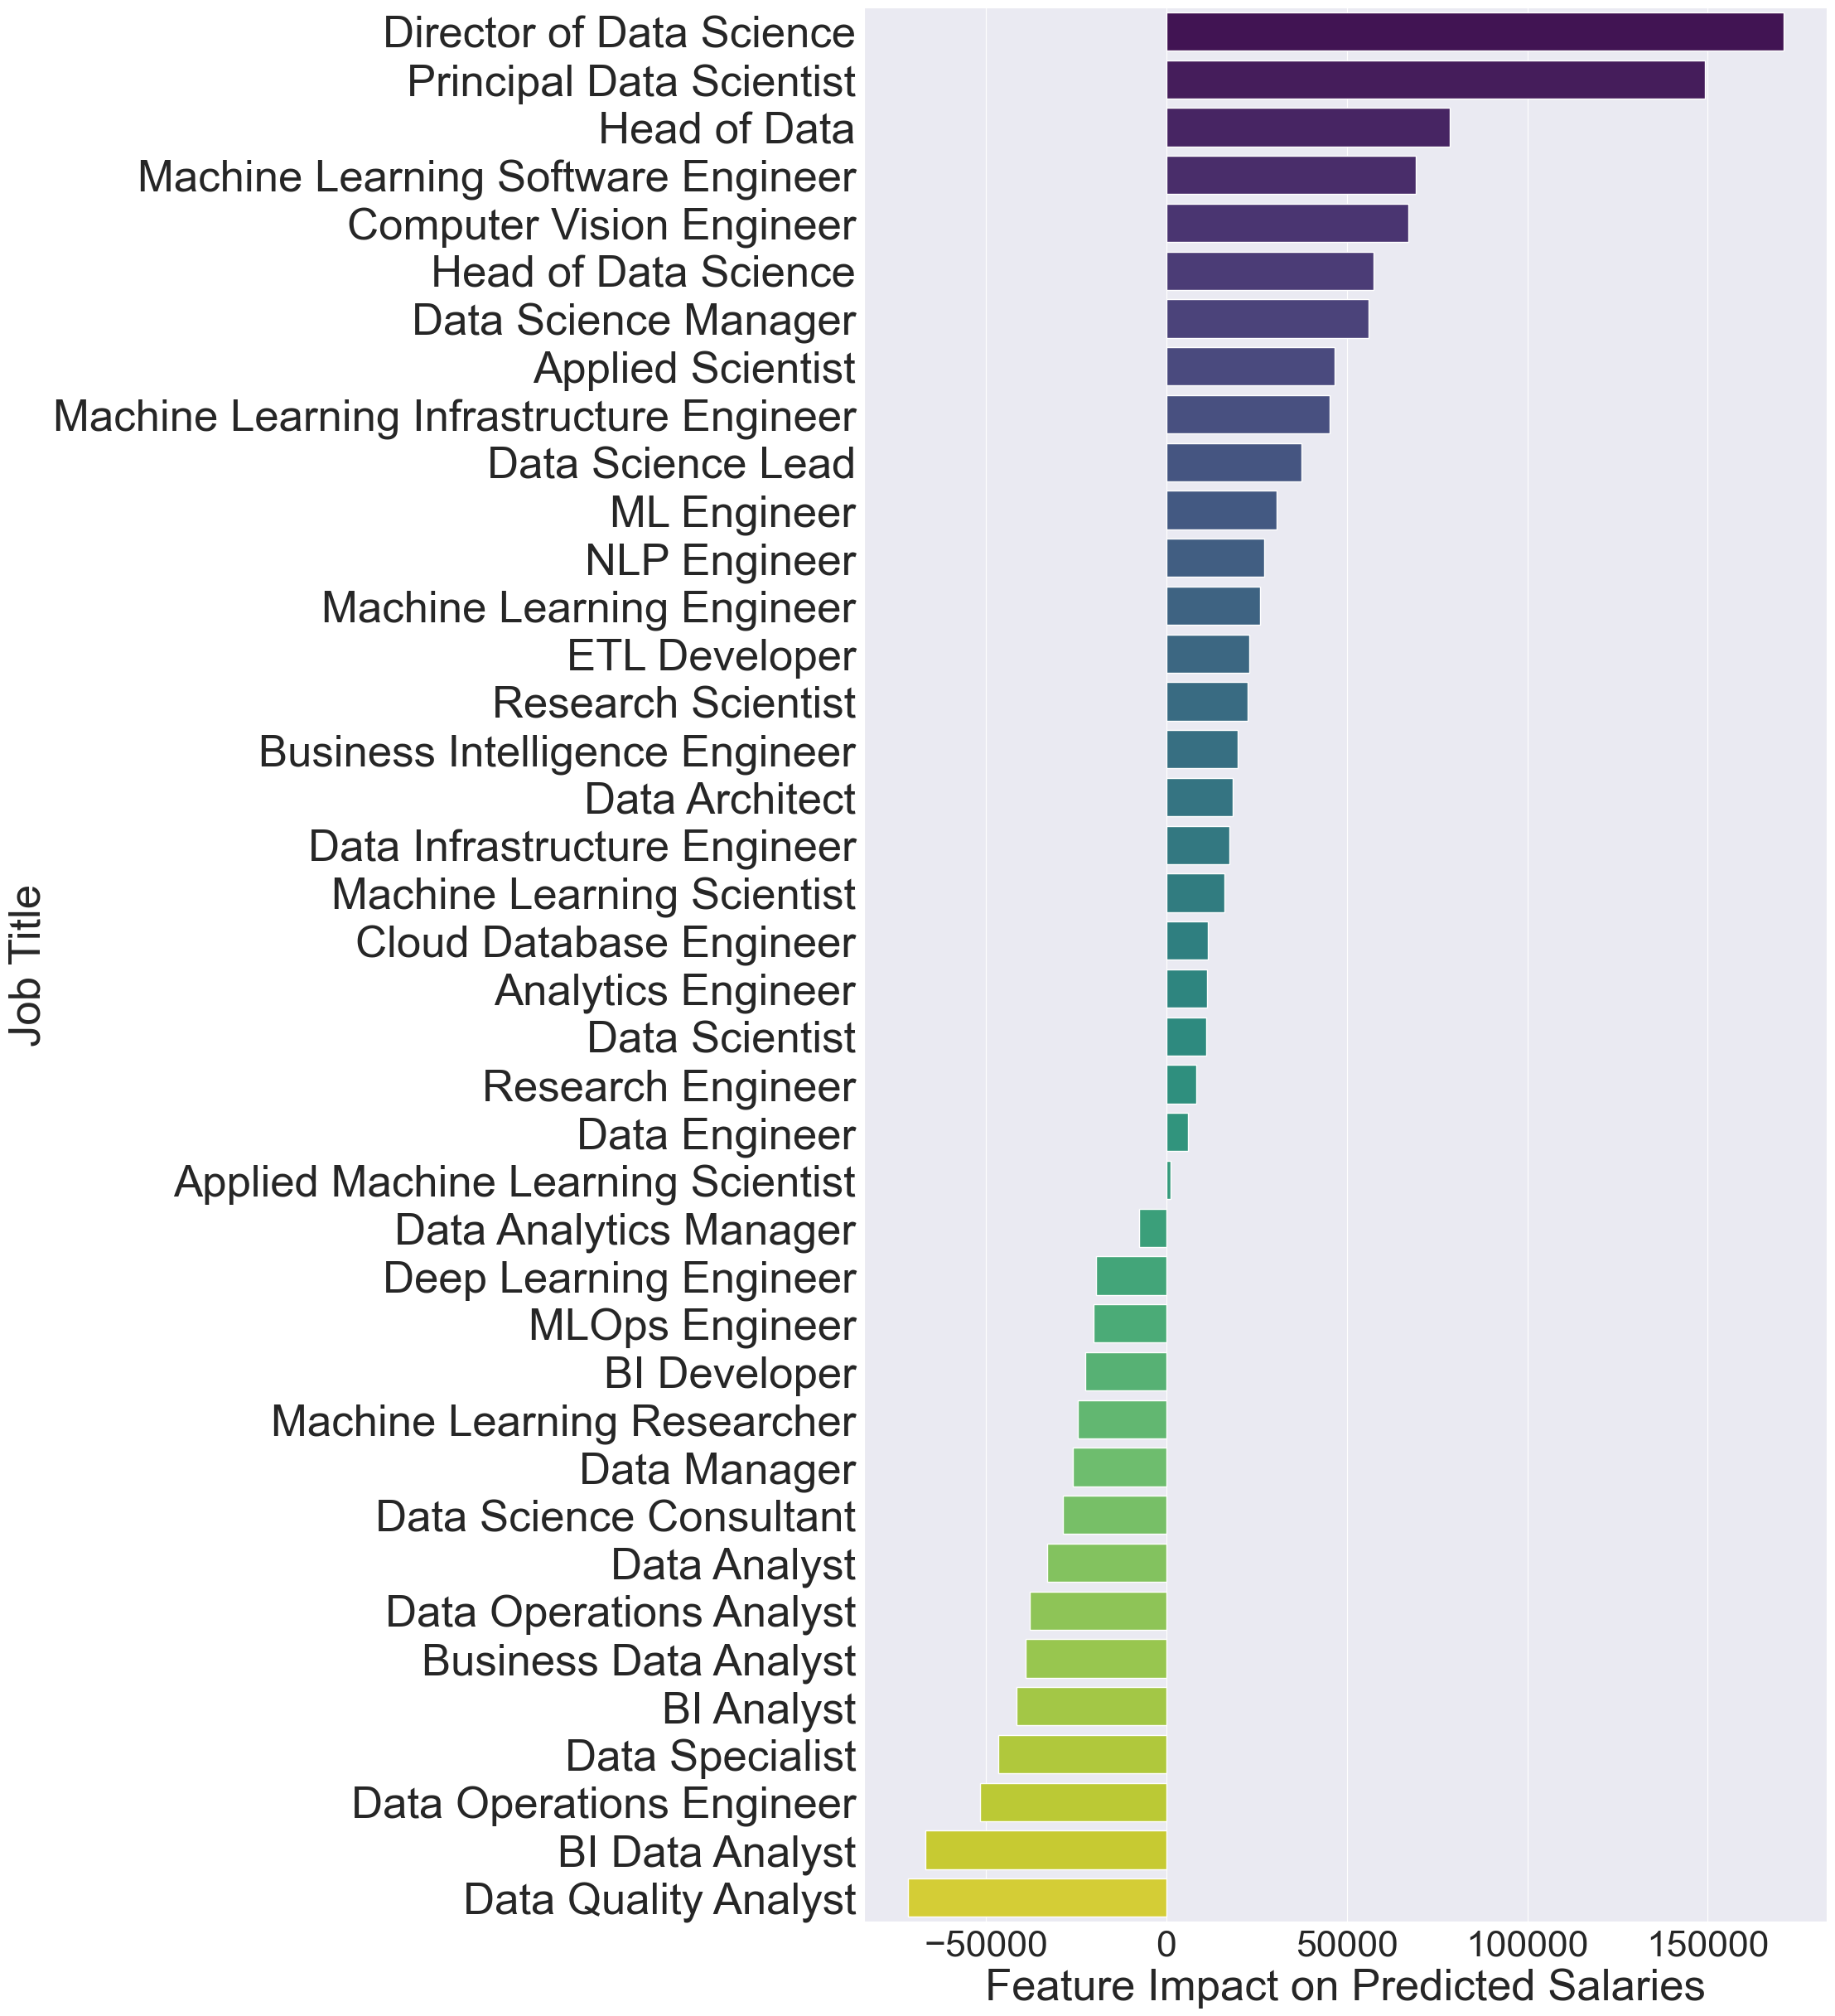

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned dataset
df = pd.read_csv('cleaned_ds_salaries.csv')

# only include the job titles that have more than 10 entries
title_counts = df['job_title'].value_counts()
df = df[df['job_title'].isin(title_counts[title_counts > 3].index)]
df.drop(columns=['experience_level'], inplace=True)

# Encode job_title as dummy variables
df_encoded = pd.get_dummies(df, columns=['job_title'], drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['adjusted_salary', 'remote_ratio', 'company_size'])
y = df_encoded['adjusted_salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict salaries on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize coefficient impacts sorted by absolute value
import seaborn as sns

#rename the columns to remove the job title prefix
X.columns = X.columns.str.replace('job_title_', '')
# Load the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients sorted by absolute value
plt.figure(figsize=(15, 30))
#font size 38
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients,
    palette='viridis',
    orient='h',
)
plt.xlabel('Feature Impact on Predicted Salaries', fontsize=38)
plt.ylabel('Job Title', fontsize=38)
# Update tick label sizes for both axes
plt.xticks(fontsize=32)
plt.yticks(fontsize=38)
plt.savefig('feature_impact_plot.png', bbox_inches='tight')
plt.show()


## Results and Analysis: Linear Regression

The linear regression model was trained and evaluated to predict adjusted salaries based on `remote_ratio` and `company_size`. Key results include:

- **Mean Squared Error (MSE)**: A metric indicating the average squared difference between actual and predicted salaries. A lower value indicates better performance.
- **R-squared**: Represents the proportion of variance in the salary data that is explained by the model. A higher value indicates a better fit.
- **Visualization**: The scatter plot compares the actual and predicted salaries, showing the model's performance. A close alignment to the diagonal line indicates accurate predictions.

In [20]:
#save the coefitions to a csv file

coefficients.to_csv('coefficients.csv', index=False)

#save the model to a file

import joblib
joblib.dump(model, 'linear_regression_model.joblib')



['linear_regression_model.joblib']